<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [8]:
from bs4 import BeautifulSoup as bs
import requests

##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
df = pd.read_csv('./data/job_listings.csv')

                


In [4]:
def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()
df['clean_desc'] = df['description'].apply(clean_description)
df = df.drop(columns='Unnamed: 0')
df.head()

,description,title,clean_desc
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [10]:
from bs4 import BeautifulSoup as bs
nlp = spacy.load('en_core_web_lg')
def remove_unicode_chars(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', '')
    return df

def remove_html(df):
    df = df.copy()
    df['description'] = df['description'].apply(lambda x: bs(x).get_text().replace("\\n", " "))
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df['description'] = df['description'].apply(lambda x: re.sub('[0-9]+', '', x))
    df['description'] = df['description'].str.lower()
    df['tokenized'] = df['description'].apply(lambda x: [token.text for token in nlp(x) 
                                                         if not token.is_stop])
    return df

In [11]:
df1 = remove_unicode_chars(df)
df1 = remove_html(df1)
df1

,Unnamed: 0,description,title,tokenized
0,0,job requirements:conceptual understanding in m...,Data scientist,"[job, requirements, :, conceptual, understandi..."
1,1,"job descriptionas a data scientist , you will ...",Data Scientist I,"[job, descriptionas, data, scientist, ,, help,..."
2,2,as a data scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"$, - $, a monthcontractunder the general super...",Data Scientist,"[$, ,, -, $, ,, monthcontractunder, general, s..."
4,4,location: usa multiple locations+ years of an...,Data Scientist,"[location, :, usa, , multiple, locations+, ye..."
...,...,...,...,...
421,421,about us:want to be part of a fantastic and fu...,Senior Data Science Engineer,"[:, want, fantastic, fun, startup, s, revoluti..."
422,422,"internshipat uber, we ignite opportunity by se...",2019 PhD Data Scientist Internship - Forecasti...,"[internshipat, uber, ,, ignite, opportunity, s..."
423,423,"$, - $, a yeara million people a year die in c...",Data Scientist - Insurance,"[$, ,, -, $, ,, yeara, million, people, year, ..."
424,424,senior data scientistjob descriptionabout usam...,Senior Data Scientist,"[senior, data, scientistjob, descriptionabout,..."


## 2) Use Spacy to tokenize the listings 

In [17]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(str(df['clean_desc']))


spacy.tokens.doc.Doc

In [20]:
print([token.lemma_ for token in doc[:10] if (token.is_stop != True) and (token.is_punct != True)])

['0', '     ', 'b"job', 'Requirements:\\nConceptual', 'understanding', '\n', '1', '     ', "b'Job"]


In [22]:
STOP_WORDS = nlp.Defaults.stop_words

In [23]:
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(df['clean_desc'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_digit is False) & (token.is_punct is False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

df['tokens'] = tokens



In [24]:
df.head()

,description,title,clean_desc,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""job, requirements:\nconceptual, understandi..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'job, description\n\nas, data, scientist, 1,..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'as, data, scientist, working, consulting, b..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $6,756, monthcontractunder, general..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'location:, usa, \xe2\x80\x93, multiple, loc..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(df['clean_desc'])

# document term matrix
dtm = vect.transform(df['clean_desc'])

In [29]:
# This is a sparse matrix with only present values (no 0s)
print(dtm)

  (0, 225)	1
  (0, 498)	1
  (0, 569)	2
  (0, 608)	2
  (0, 661)	1
  (0, 675)	1
  (0, 697)	1
  (0, 755)	1
  (0, 914)	1
  (0, 1071)	1
  (0, 1472)	1
  (0, 1528)	1
  (0, 1612)	1
  (0, 1689)	1
  (0, 2071)	1
  (0, 2132)	1
  (0, 2167)	1
  (0, 2482)	1
  (0, 2616)	1
  (0, 2848)	1
  (0, 2960)	2
  (0, 2977)	1
  (0, 3133)	1
  (0, 3160)	1
  (0, 3249)	1
  :	:
  (425, 9654)	1
  (425, 9690)	1
  (425, 9711)	1
  (425, 9759)	1
  (425, 9783)	2
  (425, 9820)	1
  (425, 9826)	1
  (425, 9828)	1
  (425, 9834)	2
  (425, 9847)	3
  (425, 9849)	1
  (425, 9863)	10
  (425, 9865)	2
  (425, 9866)	1
  (425, 9876)	6
  (425, 9882)	1
  (425, 9885)	1
  (425, 9888)	1
  (425, 9911)	5
  (425, 9924)	2
  (425, 9960)	3
  (425, 10028)	5
  (425, 10041)	2
  (425, 10052)	3
  (425, 10054)	1


In [40]:
# Make it pretty with a DataFrame, first need to make it dense
# the columns come from an attribute on the CountVectorizer object

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm1 = dtm.copy()

dtm1

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Try and get rid of some of those numbers
cols_2drop = []
for col in dtm.columns:
    if col.isnumeric():
        cols_2drop.append(col)
cols_2drop


In [56]:
dtm2 = dtm1.drop(columns=cols_2drop)
dtm2
# Still some numbers, probably have to use regex

,100k,100x,10b,10ms,10x,110k,1324b,159m,169334br,17b,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [58]:

from collections import Counter
def count(docs):
    """
    Function that takes a corpus of document and returns and dataframe of word counts for us to analyze.
    """
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [59]:
word_count = count(df.tokens)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,data,419,3751,1.0,0.030037,0.030037,0.983568
201,business,303,1008,2.0,0.008072,0.038108,0.711268
22,experience,357,941,3.0,0.007535,0.045643,0.838028
49,work,326,876,4.0,0.007015,0.052658,0.765258
82,team,314,726,5.0,0.005814,0.058472,0.737089


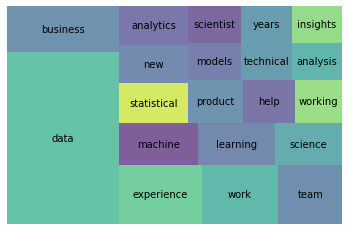

In [64]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = word_count[word_count['rank'] <=20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [66]:
# Term Frequency-Inverse Document Frequency will give scores to word counts based on uniqueness
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=500)

# Create a vocabulary
# Reminder: The vocabulary establishes all of the possible words that we might use.
# The vocabulary dictionary does not represent the counts of words. We use the original docs here
dtm_tf = tfidf.fit_transform(df['clean_desc'])

dtm_tf = pd.DataFrame(dtm_tf.todense(), columns=tfidf.get_feature_names())

dtm_tf.head()

,ability,able,access,achieve,action,actionable,ad,address,advanced,age,...,x99,x99ll,x99re,x99s,x9d,xc2,xe2,xef,year,years
0,0.120724,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.266181,0.000000,0.0,0.000000,0.00000
1,0.038988,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.115409,0.0,0.124717,0.065169,0.0,0.000000,0.220322,0.0,0.064169,0.00000
2,0.000000,0.0,0.0,0.0,0.000000,0.154847,0.0,0.0,0.117431,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000
3,0.000000,0.0,0.0,0.0,0.121405,0.000000,0.0,0.0,0.000000,0.099024,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.124930,0.00000
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.159148,0.0,0.000000,0.17264


In [67]:
# We can use spacy to do the tokenization, and use bigram words
def tokenize(document):
    """ get the lemma and tokenize"""
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop is False) and (token.is_punct is False)]

In [69]:
# instanstiate tfidf with bigram and spacy tokenizer
tfidf_spacy = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        max_df=0.97,
                        min_df=0.3,
                        tokenizer=tokenize)
dtm_tf_spacy = tfidf_spacy.fit_transform(df['clean_desc'])

# make a df out of the sparse matrix and get features from the original object
dtm_tf_spacy = pd.DataFrame(dtm_tf_spacy.todense(), columns=tfidf_spacy.get_feature_names())

dtm_tf_spacy.head()

,+,+ year,ability,advanced,algorithm,analysis,analytic,analytical,analyze,apply,...,tool,understand,understanding,use,value,veteran,work,world,write,year
0,0.000000,0.000000,0.186097,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.215759,0.000000,0.0,0.000000,0.119717,0.000000,0.206853,0.000000
1,0.084258,0.092003,0.077247,0.000000,0.085863,0.0,0.000000,0.079303,0.000000,0.000000,...,0.066975,0.0,0.089559,0.000000,0.0,0.000000,0.198774,0.160022,0.171725,0.060464
2,0.000000,0.000000,0.000000,0.175093,0.000000,0.0,0.000000,0.160178,0.176223,0.145832,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.200743,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.180411,0.000000,...,0.000000,0.0,0.000000,0.178113,0.0,0.187053,0.205514,0.000000,0.000000,0.125028
4,0.387274,0.422874,0.000000,0.000000,0.000000,0.0,0.311096,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.277910


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [70]:
# Nearest neighbors identifies a centroid to compare close points

from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
nn.fit(dtm_tf_spacy)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [75]:
# This shows the distances and similar docs compared to the first doc
nn.kneighbors([dtm_tf_spacy.iloc[0]])

(array([[0.        , 0.97082508, 1.01227969, 1.019085  , 1.02245685,
         1.02358835]]),
 array([[  0, 345,  56, 419,  49, 336]], dtype=int64))

In [87]:
df['clean_desc'][345][:1000]

"b'Small businesses are the backbone of the American economy, providing innovation, growth, and job opportunities to the communities around them. Many small businesses need funds to run and grow their business, but often don\\xe2\\x80\\x99t get the financial help they need from traditional banks. That\\xe2\\x80\\x99s where BlueVine comes in. BlueVine is a leading provider of small business financing. We\\xe2\\x80\\x99re using cutting edge technology to disrupt the traditional banking industry and develop the next generation of fast and simple financial products, designed for today\\xe2\\x80\\x99s small businesses. BlueVine is headquartered in Redwood City, CA and backed by leading investors including Menlo Ventures, Citi Ventures, SVB Financial, Nationwide Insurance, M12 (Microsoft\\xe2\\x80\\x99s Venture Arm).\\n\\nBlueVine is searching for a Junior Data Scientist, who will be responsible for the critical decision-making processes driving our automation: risk analysis, credibility sco

In [78]:
df['clean_desc'][0]
# yeah they have stats math cs in common

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [91]:
# Query a specified sample listing

sample = ["""Generous pay for capable data scientist. Responsibilities include data analysis, data engineering, using tree based models. 
Will need to generate reports to techinical managers and visualizations as well as develop apps with a team.
I hope the shape is somewhat different.
"""]
# Introduce the new sample to transform the tfidf object 
# new_query = tfidf.transform(sample)
# nn.kneighbors(new_query.todense())

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 